In [25]:
import matplotlib.image as mpimg
stads_logo = mpimg.imread('stads_logo.png')

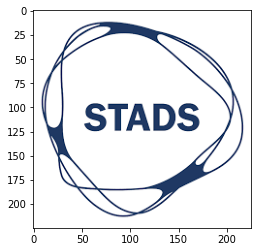

In [26]:
import matplotlib.pyplot as plt

plt.imshow(stads_logo)

In [27]:
def load_image(image_file, mode=None):
    """Load filename into a numpy array, filling in transparency with 0's.

    Parameters
    ----------
    image_file : str
        File to load. Usually works with .jpg and .png.

    Returns
    -------
    numpy.ndarray of resulting image. Has shape (w, h), (w, h, 3), or (w, h, 4)
        if black and white, color, or color with alpha channel, respectively.
    """
    image = Image.open(image_file)
    if mode is None:
        mode = image.mode
    alpha = image.convert('RGBA').split()[-1]
    background = Image.new("RGBA", image.size, (255, 255, 255, 255,))
    background.paste(image, mask=alpha)
    img = np.flipud(np.asarray(background.convert(mode)))
    img = img / 255
    if mode == 'L':  # I don't know how images work, but .png's are inverted
        img = 1 - img
    return img

In [32]:
import scipy
import numpy as np
from PIL import Image
import scipy.interpolate
from PIL import Image

img = mpimg.imread('stads_logo.png')
# img = load_image('stads.png')
    

def get_dense(inputs):

    x,y = inputs
    width = img.shape[0]
    height = img.shape[1]

    density = scipy.interpolate.RectBivariateSpline(
            x=np.arange(width),
            y=np.arange(height),
            z=img)

    """Evaluates the density of the image at the given point."""
    if x < 0 or x > width or y < 0 or y > height:
        dens = 0
    else:
        dens = density(x, y)

    return(dens)

In [33]:
num_samples = 500
samples = []
x_init = [100, 100]
x_curr = x_init
acc_count = 0
for t in range(num_samples):

    x_prop = np.random.normal(loc = x_curr, scale = 0.1)
    alpha = get_dense(x_prop)/get_dense(x_curr)

    u = np.random.random(size = 1)

    if u < alpha:
        x_curr = x_prop
        acc_count += 1

    samples.append(x_curr)

ValueError: failed in converting 3rd argument `z' of dfitpack.regrid_smth to C/Fortran array

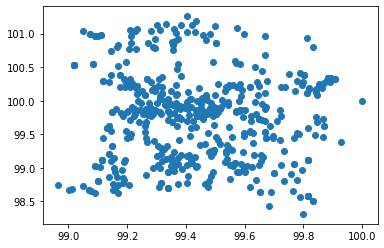

In [31]:
xs = [x[0] for x in samples]
ys = [x[1] for x in samples]
plt.scatter(xs, ys)